This program have some functions used by Jason Brownlee to scale and get the dataset


In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
from random import random

"""This program have some functions used by Jason Brownlee to scale and get the dataset"""
  

'This program have some functions used by Jason Brownlee to scale and get the dataset'

The next block of code is the one that is in charge of cleaning, building, spliting and scaling the ds

In [0]:
def load_csv(filename):
  """ This function cleans the dataset from the rows that have Null and retur a clean dataset"""
  dataset = []
  n = 4000
  with open(filename, 'r') as file:
      csvReader =  reader(file)
      for row in csvReader:
        if (not row) or ("NA" in row) or n < 0:
          continue
        dataset.append(row)
        n = n-1
  dataset.pop(0)#This is to skip the names of the columns
  return dataset


def str_column_to_float(dataset):#This changes all the values to float values, to avoid problems with max function
  for i in range(len(dataset[0])):
    for row in dataset:
      if(row[i] == 'No'):
        row[i] = 0
      elif(row[i] == 'Yes'):
        row[i] = 1
      row[i] = float(row[i])

def scale(dataset): #this gives us values between -1 and 1
  minmax = []
  for i in range(len(dataset[0])): #This is looking in each column, row example:['0', '39', '4', '1', '9', '0', '0', '0', '0', '170', '110.5', '69', '22.19', '60', '103', '0']
    columnValues = [row[i] for row in dataset]
    acum = 0
    for row in columnValues:
      acum += row
    value_min = min(columnValues)
    value_max = max(columnValues)
    minmax.append([value_min, value_max])
  for row in dataset:
    for i in range(len(row)):
      if(minmax[i][0] != 1 and (minmax[i][1] - minmax[i][0]) != 0 ):
         row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

def getYX(ds):
  y = []
  for row in ds:
    temp = row.pop(len(row)-1)
    row.append(1)
    y.append(temp)
  return y

def splitDs (dataset,splits):
  splitData = []
  cpyDs = list(dataset)
  splitSize = int(len(dataset)/splits)
  for i in range(splits):
    split= []
    for j in range(splitSize):
      split.append(cpyDs.pop())
    splitData.append(split)
  return splitData

def getDs(filename): #Build the complete and clean ds
  ds = load_csv(filename)
  str_column_to_float(ds)
  scale(ds)
  return splitDs(ds,2)

The next block is the one with the full algorithm of the Loggistic regression

In [0]:
def hy(weights, x):
  """ This function makes the hypothesis for the Logistic regressios
      weights: are the parameters that multiplies their respective x
      x: are the values from one sample
  """ 
  hyp = 0
  for i in range(len(weights)):
    hyp+=(weights[i]*x[i])
  hyp = hyp * (-1)
  hyp = 1/(1+ math.exp (hyp))
  return hyp

def gD(weights,x,y,a):
  """ Gradient descend function """
  temp=list(weights)
  for j in range(len(weights)):
      acum=0
      for i in range(len(x)):
          err=hy(weights,x[i])-y[i]
          acum+=err*x[i][j]
      temp[j]=weights[j]-a*(1/len(x))*acum
  return temp


The next block helps in monitoring the error of the model and its changes

In [0]:
def error(weights,x,y):
  acumError = 0
  avgError = 0;
  for i in range(len(x)):
    hyp = hy(weights,x[i])
    if(y[i] == 1): # avoid the log(0) error
      if(hyp ==0):
        hyp = .0001
      error = (-1)*math.log(hyp)
    if(y[i] == 0):
      if(hyp ==1):
        hyp = .9999
      error = (-1)*math.log(1-hyp)
    acumError += error
  #print( "error %f  hyp  %f  y %f " % (error, hyp,  y[i]))
  avgError = acumError/ len(x)
  return avgError

The next block its the function for the test part

In [0]:
def test(weights,x,y):
  print("\n \n Start test")
  acumLogError = 0
  acumError = 0
  accuracy = 0
  for i in range(len(x)):
    hyp = hy(weights,x[i])
    if(y[i] == 1.0): # avoid the log(0) error
      if(hyp ==0):
        hyp = .0001
      logError = (-1)*math.log(hyp)
      if(hyp > .5):
        accuracy = accuracy +1
    if(y[i] == 0.0):
      if(hyp ==1):
        hyp = .9999
      logError = (-1)*math.log(1-hyp)
      if(hyp < .5):
        accuracy = accuracy +1
    acumLogError += logError
    if (hyp >.5):
      act = 1
    else:
      act = 0
    print( "logError %f  hyp  %f activation %i y %f " % (logError,hyp, act, y[i]))
  avgLogError = acumLogError/len(x)
  accuracy = (accuracy * 100)/ len(x)
  print("Accuracy:",accuracy)
  print(avgLogError)

And the last block its the one that calls the functions, its the main function

Se han truncado las últimas 5000 líneas del flujo de salida.
0.47480220682616503
0.4724095282939208
0.4701215081671388
0.4679312423564012
0.4658330914642788
0.46382195119638664
0.4618930439697781
0.4600418567386027
0.45826411889444074
0.4565557905173564
0.4549130529204434
0.453332299481716
0.451810126385184
0.45034332329246124
0.4489288640390236
0.4475638974438175
0.4462457383018885
0.44497185861201877
0.44373987907741347
0.44254756090650915
0.4413927979324286
0.440273609062785
0.4391881310660211
0.43813461169604667
0.437111403153362
0.4361169558779938
0.43514981266730884
0.4342086031100065
0.433292038326304
0.4323989060032962
0.4315280657138341
0.43067844450684006
0.42984903275671743
0.4290388802595041
0.4282470925634358
0.4274728275218163
0.4267152920563411
0.4259737391193196
0.4252474648436841
0.4245358058700215
0.42383813684035704
0.42315386804881777
0.4224824432398232
0.42182333754485374
0.4211760555493296
0.42054012948160363
0.4199151175164544
0.4193006021859329
0.418696188890831

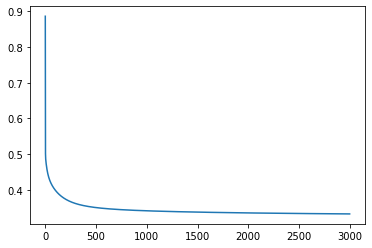

In [48]:
a = .8
weights =[]
for i in range(14):
  weights.append(random())
ds = getDs("weatherAUS.csv")
dsTrainY = getYX(ds[0])
dsTrainX = ds[0]
dsTestY = getYX(ds[1])
dsTestX = ds[1]
epoch = 3000
err = 1
graph = []

while err > .20 and epoch > 0:
  temp = list(weights)
  weights = gD(weights, dsTrainX, dsTrainY,a)
  err = error(weights,dsTrainX,dsTrainY)
  graph.append(err)
  print(err)
  epoch = epoch - 1

print("Weights:")
print(weights)
plt.plot(graph)

test(weights,dsTestX,dsTestY)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
